# Scraping, Analyzing and Visualizing Covid-19 Data for Worldwide and India.
## This is week2 version of notebook
Performing Exploratory Data Analysis and visualizing the retrieved covid-19 datasets for worldwide and India. Observations made here are for the dataset last sourced on 16 May 2020

The main focus of this notebook is to do analysis. Have executed the code inline as its simpler to focus more on analysis and the observations and the code is readable. Post this analysis, will continue to update and use the scraper class members.

#### Information about COVID-19
COVID-19 is a respiratory illness caused by a family of viruses. Symptoms include fever, coughing, sore throat and shortness of breath ranging from mild to very severe conditions. It is a contiguous virus which started from Wuhan in December 2019. WHO later declared it as Pandemic due to high rate spreads throughout the world.

COVID-19 spreads faster than other diseases, like common cold. Every virus has Basic Reproduction number (R0) which implies how many people will get the disease from the infected person. As per inital reseach work R0 of COVID-19 is 2.7.

Currently the goal of all scientists around the world is to "Flatten the Curve". COVID-19 currently has exponential growth rate around the world which we will be seeing in the notebook ahead. "Flattening the Curve" typically implies that when the number of Confirmed Cases is increasing, the distribution of those cases should be over longer timestamp. Suppose COVID-19 is going infect 100K people then those many people should be infected in 1 year but not in a month.


Every Pandemic has four stages:

Stage 1: Confirmed Cases come from other countries

Stage 2: Local Transmission Begins

Stage 3: Communities impacted with local transimission

Stage 4: Significant Transmission with no end in sight

USA is currently leading in Stage 4. While India is in on the edge of Stage 3.

Other ways to tackle the diseases like Corona are Testing, Contact Tracing and Quarantine in addition to Travel Ban, Cross-Border shutdown, Ban on immigrants 

import requests
from requests.exceptions import HTTPError
from bs4 import BeautifulSoup # for web scraping (HTML/XML parser)
import pandas as pd # Dataset handling
import numpy as np # support for calculations and pandas
import seaborn as sns # for visualization
import matplotlib.pyplot as plt # for visualization
import plotly # for visualization
import plotly.figure_factory as ff 
import plotly.express as px
import plotly.graph_objects as go

In [240]:
url_covid19_world='https://www.worldometers.info/coronavirus/'
url_covid19_India='https://www.mohfw.gov.in/'

# Performing EDA on World Data

In [253]:
df_world_summary = None
df_all_countries = None
dict_india_summary = {}
df_india_summary = None
df_indian_states = None
    
response = requests.get(url_covid19_world)
try:
    response = requests.get(url_covid19_world)
    # If the response was successful, no Exception will be raised
    response.raise_for_status()
except HTTPError as http_err:
    print(f'HTTP error occurred: {http_err}') 
except Exception as err:
    print(f'Other error occurred: {err}')  
else:
    soup=BeautifulSoup(response.text, "html.parser")
            
# Confirming that accessing the correct webpage
display(soup.title)

"""
Extracting Worldwide parameters: Confirmed Cases, Active, Recovered , Deaths
"""
# Processing the required data from the first table that is retrieved
coronatable=soup.find_all("table")[0]

<title>Coronavirus Update (Live): 4,714,692 Cases and 312,305 Deaths from COVID-19 Virus Pandemic - Worldometer</title>

In [254]:
"""
Extracting each Country parameters 
"""
c_name               = []
c_total_cases        = []
c_active             = []
c_total_recovered    = []
c_new_cases          = []
c_new_deaths         = []
c_total_deaths       = []
            
rows=coronatable.find_all("tr")[9:-8]
            
for row in rows:
    col=row.find_all("td")
    c_name.append(col[1].text.strip())
    c_total_cases.append(col[2].text.strip().replace(',','').replace('+',''))
    c_new_cases.append(col[3].text.strip().replace(',','').replace('+',''))
    c_total_deaths.append(col[4].text.strip().replace(',','').replace('+',''))
    c_new_deaths.append(col[5].text.strip().replace(',','').replace('+',''))
    c_total_recovered.append(col[6].text.strip().replace(',','').replace('+',''))
    c_active.append(col[7].text.strip().replace(',','').replace('+',''))
                

df_all_countries = pd.DataFrame(list(zip(c_name, c_total_cases, c_active, c_total_recovered, c_new_cases,    
                                c_new_deaths, c_total_deaths)),columns=["Country", "Total_Cases", "Active", "Recovered", 
                                                                        "New_Cases", "New_Deaths", "Total_Deaths" ])


#### ANALYSING & PREPARING THE DATA. Let us see what the data looks like

In [255]:
#df_all_countries.style.hide_index()
display(df_all_countries.head(10))
display(df_all_countries.shape)

,Country,Total_Cases,Active,Recovered,New_Cases,New_Deaths,Total_Deaths
0,USA,1505619,1077230,338861,21334,1021,89528
1,Spain,276505,56689,192253,2138,104,27563
2,Russia,272043,206340,63166,9200,119,2537
3,UK,240161,N/A,N/A,3450,468,34466
4,Brazil,233142,127837,89672,14919,816,15633
5,Italy,224760,70187,122810,875,153,31763
6,France,179365,90674,61066,,96,27625
7,Germany,176247,15620,152600,548,26,8027
8,Turkey,148067,35834,108137,1610,41,4096
9,Iran,118392,18308,93147,1757,35,6937


(215, 7)

#### Checking for missing/null values.
To begin processing the dataframe. Handling the missing values by first replacing it with NaN. Python recoginizes only NaN and None as NA values. Also we can see invalid text 'N/A' for some of the parameters.

In [256]:
# Checking whether parameter 'Country' is not missing values or set to invalid text 'N/A'. Else we have to drop that row.
print(df_all_countries.Country.isna().sum())
print((df_all_countries.Country == 'N/A').sum())
# We dont have any such above rows in this dataset

0
0


In [257]:
# Replacing missing values with NaN
df_all_countries.replace(r'^\s*$', np.nan, regex=True, inplace=True)

# Replacing invalid text 'N/A' with NaN
df_all_countries.replace('N/A', np.nan, inplace=True)

display(df_all_countries.head(10))

,Country,Total_Cases,Active,Recovered,New_Cases,New_Deaths,Total_Deaths
0,USA,1505619,1077230,338861,21334,1021,89528
1,Spain,276505,56689,192253,2138,104,27563
2,Russia,272043,206340,63166,9200,119,2537
3,UK,240161,NaN,NaN,3450,468,34466
4,Brazil,233142,127837,89672,14919,816,15633
5,Italy,224760,70187,122810,875,153,31763
6,France,179365,90674,61066,NaN,96,27625
7,Germany,176247,15620,152600,548,26,8027
8,Turkey,148067,35834,108137,1610,41,4096
9,Iran,118392,18308,93147,1757,35,6937


#### Checking if duplicate rows exist. Looks like there is none

In [258]:
print("Count Duplicate rows with country: ", df_all_countries.Country.duplicated().sum())
            
print("Count Duplicate rows: " , df_all_countries.duplicated().sum())


Count Duplicate rows with country:  0
Count Duplicate rows:  0


#### Lets see how many NA values in the dataset

In [259]:
df_all_countries.isna().sum()

Country           0
Total_Cases       0
Active            2
Recovered         5
New_Cases        74
New_Deaths      126
Total_Deaths     36
dtype: int64

#### Understanding what each Feature represents and identify how to fill the NA values

For parameters Active cases, Total Deaths and Recovered cases:
Imputed these values only for those countries not missing any data in the required parameters used for calculation. Otherwise replacing with 0 to avoid generating incorrect data. Verified with the dataset. 
Observe the count of missing values for each of this above parameter. I begin imputing by selecting the parameter which has the highest number of missing values.

Recovered cases = Total cases - Total Deaths - Active Cases
 ( USA  : Recovered (262328) = Total Cases (1390392) - Total Deaths (82096) - Active (1045968) )

Active cases = Total cases - Total Deaths - Recovered
 ( Spain: Active (62130) = Total Cases (269520) - Total Deaths (26920) -  Recovered (180470) )

Total Deaths : Total cases - Active cases - Recovered

New Cases, New Deaths: These parameters vary daily. We cannot fill this value with mean/mode/median. Replacing NaN with zero. 

I selected parameters New Cases, New Deaths because many of the people who got infected with Covid-19 already recovered, or on their way to full recovery. Thus it helps to show these daily numbers as well.

In [260]:
df_all_countries.New_Cases.fillna(0, inplace = True)
df_all_countries.New_Deaths.fillna(0, inplace = True)

#### Imputing values for countries missing Total death cases. We might have to iterate the data cleaning steps until the relevant amount of data is filled with intended values.

In [261]:
# Imputing Total death cases having NaN values

# Get the row indexes of countries having NaN values in the column 'Total_Deaths'
result_df = df_all_countries[df_all_countries.Total_Deaths.isna()]
#display (result_df)

# --- for debugging begins --- 
# indexes = []
# for index1 in result_df.index:
#     indexes.append(index1) 
# print(indexes)    
# # --- for debugging end --- 


for index1 in result_df.index:
    if ((result_df['Recovered'][index1] is np.nan) or (result_df['Active'][index1] is np.nan)):
        df_all_countries['Total_Deaths'][index1] = 0
    else:
        df_all_countries['Total_Deaths'][index1] = int(df_all_countries['Total_Cases'][index1]) - \
                                                int(df_all_countries['Active'][index1]) - \
                                                int(df_all_countries['Recovered'][index1])
# --- for debugging begins ---         
# for i in indexes:
#     print(df_all_countries['Country'][i], df_all_countries['Recovered'][i], df_all_countries['Active'][i], df_all_countries['Total_Deaths'][i] )


In [262]:
# Imputing Recovered cases having NaN values

# Get the row indexes of countries having NaN values in the column 'Recovered'
result_df = df_all_countries[df_all_countries.Recovered.isna()]
#display (result_df)

# --- for debugging begins --- 
# indexes = []
# for index1 in result_df.index:
#     indexes.append(index1) 
# print(indexes)    
# --- for debugging end --- 


for index1 in result_df.index:
    if ((result_df['Active'][index1] is np.nan) or (result_df['Total_Deaths'][index1] is np.nan)):
        df_all_countries['Recovered'][index1] = 0
    else:
        df_all_countries['Recovered'][index1] = int(df_all_countries['Total_Cases'][index1]) - \
                                                int(df_all_countries['Active'][index1]) - \
                                                int(df_all_countries['Total_Deaths'][index1])
# --- for debugging begins ---         
# for i in indexes:
#     print(df_all_countries['Country'][i], df_all_countries['Recovered'][i], df_all_countries['Active'][i], df_all_countries['Total_Deaths'][i] )


In [263]:
# Imputing Active cases having NaN values

# Get the row indexes of countries having NaN values in the column 'Recovered'
result_df = df_all_countries[df_all_countries.Active.isna()]
#display (result_df)

# --- for debugging begins --- 
# indexes = []
# for index1 in result_df.index:
#     indexes.append(index1) 
# print(indexes)    
# --- for debugging end --- 


for index1 in result_df.index:
    if ((result_df['Recovered'][index1] is np.nan) or (result_df['Total_Deaths'][index1] is np.nan)):
        df_all_countries['Active'][index1] = 0
    else:
        df_all_countries['Active'][index1] = int(df_all_countries['Total_Cases'][index1]) - \
                                                int(df_all_countries['Recovered'][index1]) - \
                                                int(df_all_countries['Total_Deaths'][index1])
# --- for debugging begins ---         
# for i in indexes:
#     print(df_all_countries['Country'][i], df_all_countries['Recovered'][i], df_all_countries['Active'][i], df_all_countries['Total_Deaths'][i] )


In [264]:
df_all_countries.isna().sum()

Country         0
Total_Cases     0
Active          0
Recovered       0
New_Cases       0
New_Deaths      0
Total_Deaths    0
dtype: int64

In [266]:
display(df_all_countries.dtypes)

# Convert datatype from object to int. We can perform calculations and plotting
df_all_countries.New_Cases  = df_all_countries.New_Cases.astype(int)
df_all_countries.New_Deaths = df_all_countries.New_Deaths.astype(int)
df_all_countries.Active     = df_all_countries.Active.astype(int)
df_all_countries.Total_Cases = df_all_countries.Total_Cases.astype(int)
df_all_countries.Total_Deaths = df_all_countries.Total_Deaths.astype(int)
df_all_countries.Recovered = df_all_countries.Recovered.astype(int)

display(df_all_countries.dtypes)


Country         object
Total_Cases     object
Active          object
Recovered       object
New_Cases       object
New_Deaths      object
Total_Deaths    object
dtype: object

Country         object
Total_Cases      int32
Active           int32
Recovered        int32
New_Cases        int32
New_Deaths       int32
Total_Deaths     int32
dtype: object

#### Generating World Summary for Covid-19 Data

In [275]:
dict_world_summary = {}
dict_world_summary['Total_Cases']   = df_all_countries['Total_Cases'].sum()
dict_world_summary['Active']        = df_all_countries['Active'].sum()
dict_world_summary['Recovered']     = df_all_countries['Recovered'].sum()
dict_world_summary['Total_Deaths']  = df_all_countries['Total_Deaths'].sum()

df_world_summary = pd.DataFrame([dict_world_summary])

# displaying data as shown below in the order of colunns mentioned
print("___________________________________________________________________________________")
print("Covid-19 updates for Worldwide")
print("___________________________________________________________________________________")
display(df_world_summary[['Total_Cases','Active', 'Recovered','Total_Deaths']])

___________________________________________________________________________________
Covid-19 updates for Worldwide
___________________________________________________________________________________


,Total_Cases,Active,Recovered,Total_Deaths
0,4714692,2593258,1809129,312305


In [276]:
df_all_countries.sort_values(['Total_Cases'], inplace=True, ascending=False)

## Looking for insights in the data. 

In [277]:
#Descriptive analysis
display(df_all_countries.drop([0]).describe())

,Total_Cases,Active,Recovered,New_Cases,New_Deaths,Total_Deaths
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,14995.668224,7084.242991,6870.411215,336.869159,14.626168,1041.014019
std,44291.113826,24275.718053,23307.998457,1334.307340,70.123904,4392.260791
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,118.250000,26.000000,36.000000,0.000000,0.000000,2.000000
50%,844.000000,306.500000,306.000000,11.000000,0.000000,17.500000
75%,6656.250000,2662.000000,2554.250000,117.000000,3.000000,161.500000
max,276505.000000,206340.000000,192253.000000,14919.000000,816.000000,34466.000000


#### Exploring heatmap of the leading countries with total confirmed cases.
Heatmap gives many insights in one-go. Low-value data points to high value data points in this dataset are represented by the least to most opaque color shade.

In [278]:
# dataframe holds dataset from the top 10 countries with highest number of total confirmed cases
df_top_10 = df_all_countries[['Country','Total_Cases','Active','Recovered','New_Deaths','Total_Deaths']].sort_values('Total_Cases', ascending=False).head(10)

# Droppng outlier USA to make the plotting effective for this study
df_top_10 = df_top_10.drop([0]) 

#display(df_top_10)
#Todo: how to show visible text in opaque color
#df_top_10.style.background_gradient(cmap='Reds', subset=['Total_Cases'])\
#                     .background_gradient(cmap='Blues', subset=['Active'])\
#                     .background_gradient(cmap='Greens', subset=['Recovered'])\
#                     .background_gradient(cmap='Purples', subset=['New_Deaths'])\
#                     .background_gradient(cmap='YlOrBr', subset=['Total_Deaths'])

# Find it more appealing to use one color map in this usecase. It helps to quickly relate this dataset and gather insights
df_top_10.style.background_gradient(cmap='Reds')

,Country,Total_Cases,Active,Recovered,New_Deaths,Total_Deaths
1,Spain,276505,56689,192253,104,27563
2,Russia,272043,206340,63166,119,2537
3,UK,240161,205695,0,468,34466
4,Brazil,233142,127837,89672,816,15633
5,Italy,224760,70187,122810,153,31763
6,France,179365,90674,61066,96,27625
7,Germany,176247,15620,152600,26,8027
8,Turkey,148067,35834,108137,41,4096
9,Iran,118392,18308,93147,35,6937


In [282]:
# Top 10 countries with Active cases
# ----- Old code ------
# df = df_top_10.sort_values('Active', ascending=False)
# ax=sns.barplot(x=df['Country'], y=df['Active'])
# ax.set_title("Top 10 Countries (Active Cases)")

#### In any Epidemic, the study of Mortality rate and Recovery rate is important.
Recovered Vs Cumulative Deaths Analysis. Ideally this should be a flatter curve. But its showing that number of deaths is also increasing, as the number of recoveries are increasing.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



Text(0.5,1,'Recovered V/S Cumulative Deaths Analysis - Worldwide countries')

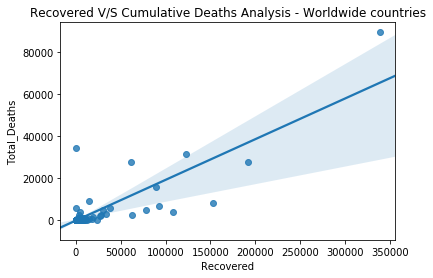

In [281]:
ax = sns.regplot(x ='Recovered',y='Total_Deaths', data=df_all_countries) 
ax.set_title("Recovered V/S Cumulative Deaths Analysis - Worldwide countries")

#### Exploring current trend of Daily -  new cases and new deaths across the world

In [274]:
# f, ax = plt.subplots(figsize=(15, 7))
# sns.barplot( x='New_Cases',y='New_Deaths', hue='Country', data=df_top_10_worst)

# ----- Basic Version ------
# fig = go.Figure(
#      data = go.Scatter(
#          x=df['Date'], y=df['Total Confirmed'], \
#          mode='lines+markers',name='Total Covid-19 Cases in India'
#      )
# )
# fig


fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=df_all_countries['Country'], y=df_all_countries['New_Cases'],
        mode='lines+markers',
        name='New Daily cases', # this sets its legend entry 
        marker= dict(color='rgb(255,104,98)', line = dict(color='rgb(255,104,98)'))
    )
)

fig.add_trace(
    go.Scatter(
        x=df_all_countries['Country'], y=df_all_countries['New_Deaths'], 
        mode='lines+markers',
        name='New Daily Deaths', # this sets its legend entry
        marker= dict(color='Black', line = dict(color='Black'))
    )
)

fig.update_layout(
    title = "Current trend of Daily - New Cases and New Deaths across the world"
)
fig


#### Covid-19 total confirmed cases percent split in different countries (Pie visualization)
Plotting pie plot showing the proportion of the spread of this Pandemic across the world. Each pie is showing a few major contributor countries, and rest countries are shown as "Others". 

Criteria: Confirmed Cases: Any countries reported more than 50000 confirmed cases are shown and the rest of the countries are under "others" Category.

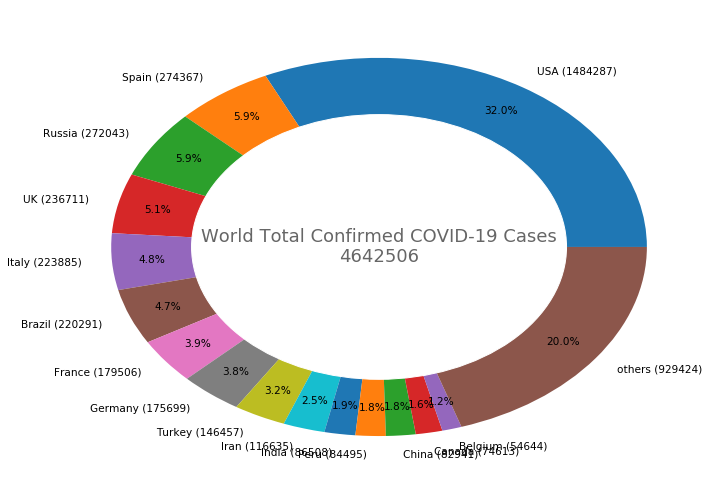

In [59]:
f = plt.figure(figsize=(12,40))

stats = [df_all_countries.loc[:,['Country','Total_Cases']]] #Access the entire column Country and Total_Cases
label = ["Confirmed"]
threshold = [50000]
for i, stat in enumerate(stats):
    plt.tight_layout()
    df_countries = stat.groupby(["Country"]).sum()
    df_countries = df_countries.sort_values(df_countries.columns[-1],ascending= False)
    others = df_countries[df_countries[df_countries.columns[-1]] < threshold[i] ].sum()[-1]
    df_countries = df_countries[df_countries[df_countries.columns[-1]] > threshold[i]]
    df_countries = df_countries[df_countries.columns[-1]]
    df_countries["others"] = others
    labels = [df_countries.index[i] +" (" + str(int(df_countries[i])) +") "for i in range(df_countries.shape[0])]

    ax = f.add_subplot(4,1,i+1)
    plt.pie(df_countries, labels=labels,autopct='%1.1f%%',pctdistance=0.85, labeldistance=1.1,textprops = {'fontsize':10.5})
    my_circle=plt.Circle( (0,0), 0.7, color='white')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.text(0.5,0.5,"World Total "+label[i]+ " COVID-19 Cases\n"+str(stat.sum().values[1]), horizontalalignment='center',verticalalignment='center',transform=ax.transAxes, size=18, alpha = 0.6)


plt.show()

# EDA on India Data

In [285]:
response = requests.get(url_covid19_India)
soup=BeautifulSoup(response.text, "html.parser")
# Confirming that we are on the correct webpage
display(soup.title)

<title>MoHFW | Home</title>

In [295]:
dict_india_summary = {}
dict_india_summary['Active']   = int(soup.find("li", class_ = "bg-blue").strong.text.strip() or 0)
dict_india_summary['Recovered']  = int(soup.find("li", class_ = "bg-green").strong.text.strip() or 0)
dict_india_summary['Total_Deaths'] = int(soup.find("li", class_ = "bg-red").strong.text.strip() or 0)

In [296]:
"""
Get data for the Indian states 
"""
state_names=[]
state_total_cases=[]
state_total_recovered=[]
state_total_deaths=[]

india_states_table = soup.find("table", class_="table table-striped")
rows=india_states_table.find_all("tr")[1:34]
#display(rows)
for row in rows:
    col=row.find_all("td")
#     print(col[1].text, col[2].text, col[3].text, col[4])
    state_names.append(col[1].text.strip())
    state_total_cases.append(col[2].text.strip())
    state_total_recovered.append(col[3].text.strip())
    state_total_deaths.append(col[4].text.strip())

df_indian_states = pd.DataFrame(list(zip(state_names, state_total_cases, state_total_recovered,  state_total_deaths)),
                                          columns=["States","Total_Cases", "Recovered", "Total_Deaths"])
                                                            
display(df_indian_states.head())      

,States,Total_Cases,Recovered,Total_Deaths
0,Andaman and Nicobar Islands,33,33,0
1,Andhra Pradesh,2307,1252,48
2,Arunachal Pradesh,1,1,0
3,Assam,90,41,2
4,Bihar,1018,438,7


#### Check if missing values

In [297]:
df_indian_states.isna().sum()

States          0
Total_Cases     0
Recovered       0
Total_Deaths    0
dtype: int64

#### Converting object datatype to int for calculations and plotting

In [298]:
df_indian_states.dtypes

States          object
Total_Cases     object
Recovered       object
Total_Deaths    object
dtype: object

In [299]:
df_indian_states.Total_Cases = df_indian_states.Total_Cases.astype(int)
df_indian_states.Recovered   = df_indian_states.Recovered.astype(int)
df_indian_states.Total_Deaths = df_indian_states.Total_Deaths.astype(int)
df_indian_states.dtypes

States          object
Total_Cases      int32
Recovered        int32
Total_Deaths     int32
dtype: object

#### Generating total number of confirmed cases in India

In [301]:
dict_india_summary['Total_Cases'] = df_indian_states.Total_Cases.sum()
df_india_summary = pd.DataFrame([dict_india_summary])
# df_india_summary = pd.DataFrame([dict_india_summary])
# print("___________________________________________________________________________________")
# print("Covid-19 updates for India")
# print("___________________________________________________________________________________")
# display(df_india_summary)

#### Generating number of Active cases for each Indian state

In [302]:
df_indian_states['Active'] = df_indian_states.Total_Cases - df_indian_states.Recovered - df_indian_states.Total_Deaths

In [303]:
df_indian_states = df_indian_states[['States','Total_Cases','Active','Recovered','Total_Deaths']]
df_indian_states = df_indian_states.sort_values('Total_Cases', ascending=False)
df_indian_states.head(10).style.background_gradient(cmap='Blues')

,States,Total_Cases,Active,Recovered,Total_Deaths
19,Maharashtra,29100,21468,6564,1068
27,Tamil Nadu,10108,7438,2599,71
10,Gujarat,9931,5290,4035,606
8,Delhi,8895,5254,3518,123
26,Rajasthan,4727,1925,2677,125
18,Madhya Pradesh,4595,2073,2283,239
31,Uttar Pradesh,4057,1797,2165,95
32,West Bengal,2461,1407,829,225
1,Andhra Pradesh,2307,1007,1252,48
25,Punjab,1935,1598,305,32


#### Generating Mortality Rate (per 100) (Features Engineering)

In [115]:
df_indian_states['Mortality_Rate (per 100)'] = np.round(np.nan_to_num(100*df_indian_states['Total_Deaths']/df_indian_states['Total_Cases']),2)
df_indian_states.head(10).style.background_gradient(cmap='Blues')

,States,Total_Cases,Active,Recovered,Total_Deaths,Mortality_Rate (per 100)
19,Maharashtra,29100,21468,6564,1068,3.67
27,Tamil Nadu,10108,7438,2599,71,0.7
10,Gujarat,9931,5290,4035,606,6.1
8,Delhi,8895,5254,3518,123,1.38
26,Rajasthan,4727,1925,2677,125,2.64
18,Madhya Pradesh,4595,2073,2283,239,5.2
31,Uttar Pradesh,4057,1797,2165,95,2.34
32,West Bengal,2461,1407,829,225,9.14
1,Andhra Pradesh,2307,1007,1252,48,2.08
25,Punjab,1935,1598,305,32,1.65


Text(0.5,1,'Top 10 States (Active Cases)')

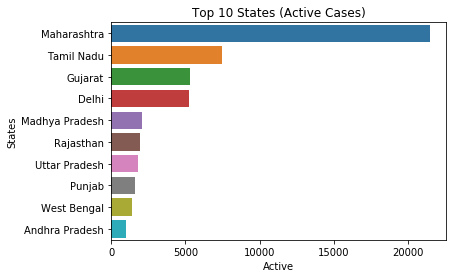

In [304]:
df = df_indian_states.sort_values('Active', ascending=False).head(10)
ax = sns.barplot(x=df['Active'], y=df['States'])
ax.set_title("Top 10 States (Active Cases)")

# Old code -------------------------------------
#plt.title("Top 10 States (Active Cases)",fontsize=12)
#plt.xlabel("Active Cases",fontsize=12)
#plt.barh(df['States'], df['Active'])
#------------------------------------------

#### Plotting Total Covid-19 Cases in India (Confirmed, Recovered, Deceased)

In [305]:
# Downloaded the Covid19 time_series dataset for India from this source : https://api.covid19india.org/csv/
# This .csv is last updated on 16 May 2020

df = pd.read_csv(r'csv/covid_india_time_series.csv')
display(df.head())
print('df.shape : ',  df.shape)
display(df.dtypes)
display("Checking null values: ", df.isna().sum())

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,30-Jan,1,1,0,0,0,0
1,31-Jan,0,1,0,0,0,0
2,1-Feb,0,1,0,0,0,0
3,2-Feb,1,2,0,0,0,0
4,3-Feb,1,3,0,0,0,0


df.shape :  (108, 7)


Date               object
Daily Confirmed     int64
Total Confirmed     int64
Daily Recovered     int64
Total Recovered     int64
Daily Deceased      int64
Total Deceased      int64
dtype: object

'Checking null values: '

Date               0
Daily Confirmed    0
Total Confirmed    0
Daily Recovered    0
Total Recovered    0
Daily Deceased     0
Total Deceased     0
dtype: int64

In [306]:
# ----- Basic Version ------
# fig = go.Figure(
#      data = go.Scatter(
#          x=df['Date'], y=df['Total Confirmed'], \
#          mode='lines+markers',name='Total Covid-19 Cases in India'
#      )
# )
# fig


fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=df['Date'], y=df['Total Confirmed'],
        mode='lines+markers',
        name='Confirmed', # this sets its legend entry 
        marker= dict(color='rgb(255,104,98)', line = dict(color='rgb(255,104,98)'))
    )
)

fig.add_trace(
    go.Scatter(
        x=df['Date'], y=df['Total Recovered'], 
        mode='lines+markers',
        name='Recovered', # this sets its legend entry
        marker= dict(color='Blue', line = dict(color='Blue'))
    )
)

fig.add_trace(
    go.Scatter(
        x=df['Date'], y=df['Total Deceased'], 
        mode='lines+markers',
        name='Deceased', # this sets its legend entry
        marker= dict(color='Black', line = dict(color='Black'))
    )
)

fig.update_layout(
    title = "Total Covid-19 Cases in India"
)
fig

# ---------- Another way to plot.. -------------
# trace = go.Scatter(
#     x=df['Date'], y=df['Total Confirmed'], \
#     mode='lines+markers',name='Total Covid-19 Cases in India'
# )
# data = [trace]
# plotly.offline.iplot(data,filename='Total_Covid19Cases_In_India')


#### Plotting Total Covid-19 cases in Top 10 States of India (Confirmed, Recovered, Deceased)

In [321]:
# Downloaded the Covid19 state-wise dataset for India from this source on 16 May 2020 : https://api.covid19india.org/csv/ 

df = pd.read_csv(r'csv/covid_india_state_wise.csv')
display(df.head())
print('df.shape : ',  df.shape)
display(df.dtypes)
display("Checking null values: ", df.isna().sum())
df = df.sort_values('Confirmed', ascending=False)
#df = df.head(10)

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes
0,Maharashtra,29100,6564,1068,21468,15/05/2020 20:43:24,MH,0,0,0,[10-May]<br>\n- Total numbers are updated to t...
1,Tamil Nadu,10108,2599,71,7438,15/05/2020 23:22:24,TN,0,0,0,NaN
2,Gujarat,9932,4035,606,5291,15/05/2020 20:53:24,GJ,0,0,0,NaN
3,Delhi,9333,3926,129,5278,16/05/2020 14:13:23,DL,438,408,6,[10-May]<br>\n\nDelhi will be releasing bullet...
4,Madhya Pradesh,4595,2283,239,2073,15/05/2020 19:23:24,MP,0,0,0,NaN


df.shape :  (37, 11)


State                object
Confirmed             int64
Recovered             int64
Deaths                int64
Active                int64
Last_Updated_Time    object
State_code           object
Delta_Confirmed       int64
Delta_Recovered       int64
Delta_Deaths          int64
State_Notes          object
dtype: object

'Checking null values: '

State                 0
Confirmed             0
Recovered             0
Deaths                0
Active                0
Last_Updated_Time     0
State_code            0
Delta_Confirmed       0
Delta_Recovered       0
Delta_Deaths          0
State_Notes          28
dtype: int64

#### Plotting Total Covid-19 Cases by States in India (Last updated on 16 May '20)

In [322]:
# https://plotly.com/python/bar-charts/
# ----- Basic Version ------
# fig = go.Figure(
#      data = go.Bar(
#          x=df['State'], y=df['Confirmed'], \
#          name='Confirmed'
#      )
# )
# fig


fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=df['State'], y=df['Confirmed'], 
        name='Confirmed',
        marker_color='rgb(255,104,98)' 
    )
)

fig.add_trace(
    go.Bar(
        x=df['State'], y=df['Recovered'], 
        name='Recovered',
        marker_color='Blue'
    )
)

fig.add_trace(
    go.Bar(
        x=df['State'], y=df['Deaths'], 
        name='Deceased' ,
        marker_color='Black'
    )
)

fig.update_layout(
    title = "Total Covid-19 Cases by States in India (Last updated on 16 May '20')"
)
fig.show()

#### Journey of different Countries in COVID-19
When we see daily news reports on COVID-19 it's really hard to interpret what's actually happening, since the numbers are changing so rapidly but that's something expected from Exponential growth. Since almost all the pandemics tend to grow exponentially it's really hard to understand for someone from a non-mathematical or non-statistical background. We are more concerned about how we are doing and where we are heading in this pandemic rather than just looking at those exponentially growing numbers. 
The growth won't be exponentially forever. At some point of time the curve will become flat. We humans will be able to control this pandemic like we did in the past.

#### Some of the parameters that can be explored
- Data on Hospitalizations and ICU admissions (Can also further plot disaggregate using gender data)
- Data on Cases on HealthCare workers
- Covid-19 Tests conducted and its analysis
- Rate of Doubling for Confirmed Cases

#### Some of the visualizations that can be explored
- Where does India stand in comparison to top leading Covid-19 countries 